In [1]:
from google.colab import drive
drive.mount("/content/drive")
import zipfile 
with zipfile.ZipFile('/content/drive/My Drive/Vision_Arcadia/gestures.zip','r') as zip_ref:
    zip_ref.extractall('/content/data/')

Mounted at /content/drive


In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import pandas as pd
from skimage.transform import resize
from imageio import imread
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random as rn

rn.seed(30)
from keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization, Input
from sklearn.model_selection import train_test_split
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

tf.random.set_seed(30)

In [3]:
train_dir = "/content/data/gestures/train"
test_dir = "/content/data/gestures/val"
img_size = (100,100)


In [4]:
train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=False,
                                   rescale=1. / 255,
                                   validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.8)


In [5]:
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=img_size,
                                                    batch_size=64,
                                                    color_mode="grayscale",
                                                    class_mode="categorical",
                                                    subset="training",
                                                    shuffle=True,
                                                    seed=42)
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    shuffle=True,
    seed=42)
#same for testing

Found 1960 images belonging to 7 classes.
Found 840 images belonging to 7 classes.


In [6]:
model = Sequential(name="Sequential_CNN")

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "Sequential_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8667392   
_________________________________________________________________
dropout (Dropout)            (None, 256)            

In [7]:
epochs = 6
batch_size = 64

In [8]:
history = model.fit(x=train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)

Epoch 1/6
31/31 [==============================] - 36s 139ms/step - loss: 0.5570 - accuracy: 0.8046 - val_loss: 0.1985 - val_accuracy: 0.9667
Epoch 2/6
31/31 [==============================] - 4s 127ms/step - loss: 0.0845 - accuracy: 0.9735 - val_loss: 0.1403 - val_accuracy: 0.9714
Epoch 3/6
31/31 [==============================] - 4s 125ms/step - loss: 0.0310 - accuracy: 0.9918 - val_loss: 0.1435 - val_accuracy: 0.9774
Epoch 4/6
31/31 [==============================] - 4s 126ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.0865 - val_accuracy: 0.9786
Epoch 5/6
31/31 [==============================] - 4s 125ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0873 - val_accuracy: 0.9881
Epoch 6/6
31/31 [==============================] - 4s 124ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0756 - val_accuracy: 0.9881


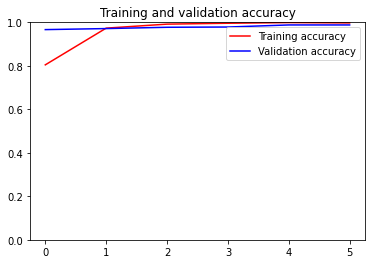

<Figure size 432x288 with 0 Axes>

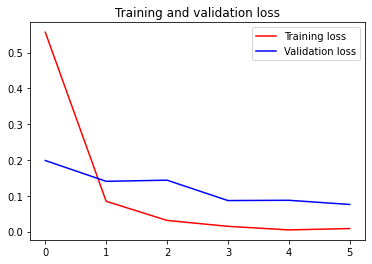

In [9]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim([0.00, 1.00])
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [10]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(validation_generator)
print("final train accuracy = {:.2f}, validation accuracy = {:.2f}".format(
    train_acc * 100, test_acc * 100))

14/14 [==============================] - 1s 37ms/step - loss: 0.0756 - accuracy: 0.9881
final train accuracy = 99.95, validation accuracy = 98.81


In [11]:
model.save("/content/Model_Hand_Gestures")

INFO:tensorflow:Assets written to: /content/Model_Hand_Gestures/assets


In [12]:
!zip -r /content/Model_Hand_Gestures.zip /content/Model_Hand_Gestures

  adding: content/Model_Hand_Gestures/ (stored 0%)
  adding: content/Model_Hand_Gestures/keras_metadata.pb (deflated 91%)
  adding: content/Model_Hand_Gestures/saved_model.pb (deflated 89%)
  adding: content/Model_Hand_Gestures/variables/ (stored 0%)
  adding: content/Model_Hand_Gestures/variables/variables.index (deflated 65%)
  adding: content/Model_Hand_Gestures/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/Model_Hand_Gestures/assets/ (stored 0%)


In [13]:
files.download('/content/Model_Hand_Gestures.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>